In [1]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
od.download("https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated")


Skipping, found downloaded files in ".\top-spotify-songs-in-73-countries-daily-updated" (use force=True to force download)


In [3]:
href = "top-spotify-songs-in-73-countries-daily-updated/"
spotify_df = pd.read_csv(href + "universal_top_spotify_songs.csv")
spotify_df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2GxrNKugF82CnoRFbQfzPf,i like the way you kiss me,Artemas,1,0,0,NaN,2024-04-11,96,False,...,11,-4.263,1,0.0447,0.000938,0.010600,0.0826,0.747,151.647,4
1,0AjmK0Eai4zGrLaJwPvrDp,Too Sweet,Hozier,2,0,3,NaN,2024-04-11,83,False,...,10,-5.505,1,0.0412,0.029500,0.000809,0.0398,0.934,117.038,4
2,3xkHsmpQCBMytMJNiDf3Ii,Beautiful Things,Benson Boone,3,1,47,NaN,2024-04-11,77,False,...,10,-5.692,1,0.0603,0.151000,0.000000,0.1400,0.219,105.029,3
3,3qhlB30KknSejmIvZZLjOD,End of Beginning,Djo,4,-1,-1,NaN,2024-04-11,98,False,...,2,-7.643,1,0.0584,0.035100,0.002590,0.0707,0.912,159.982,4
4,6XjDF6nds4DE2BBbagZol6,Gata Only,"FloyyMenor, Cris Mj",5,1,2,NaN,2024-04-11,95,True,...,8,-8.472,0,0.0509,0.446000,0.000024,0.0899,0.669,99.986,4


In [4]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638753 entries, 0 to 638752
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          638753 non-null  object 
 1   name                638728 non-null  object 
 2   artists             638728 non-null  object 
 3   daily_rank          638753 non-null  int64  
 4   daily_movement      638753 non-null  int64  
 5   weekly_movement     638753 non-null  int64  
 6   country             630046 non-null  object 
 7   snapshot_date       638753 non-null  object 
 8   popularity          638753 non-null  int64  
 9   is_explicit         638753 non-null  bool   
 10  duration_ms         638753 non-null  int64  
 11  album_name          638508 non-null  object 
 12  album_release_date  638508 non-null  object 
 13  danceability        638753 non-null  float64
 14  energy              638753 non-null  float64
 15  key                 638753 non-nul

In [5]:
spotify_df.isna().sum()

spotify_id               0
name                    25
artists                 25
daily_rank               0
daily_movement           0
weekly_movement          0
country               8707
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name             245
album_release_date     245
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

In [6]:
spotify_df.duplicated().sum()

0

In [7]:
spotify_df.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000,638753.000000
mean,25.482074,0.937032,2.957023,77.594731,193429.963502,0.680724,0.648038,5.401803,-6.543994,0.530473,0.097757,0.282049,0.016521,0.175898,0.537401,122.533566,3.892032
std,14.426603,7.035024,12.218217,15.953597,50468.594012,0.139893,0.163298,3.505873,2.653546,0.499071,0.092123,0.258528,0.088801,0.129345,0.229486,28.526231,0.441723
min,1.000000,-49.000000,-49.000000,0.000000,0.000000,0.000000,0.001890,0.000000,-31.356000,0.000000,0.000000,0.000008,0.000000,0.015400,0.000000,0.000000,0.000000
25%,13.000000,-1.000000,-3.000000,67.000000,161546.000000,0.582000,0.545000,2.000000,-7.916000,0.000000,0.039900,0.073900,0.000000,0.097600,0.361000,99.974000,4.000000
50%,25.000000,0.000000,0.000000,82.000000,186000.000000,0.699000,0.668000,6.000000,-6.182000,1.000000,0.059000,0.188000,0.000001,0.121000,0.533000,119.958000,4.000000
75%,38.000000,2.000000,5.000000,90.000000,218293.000000,0.787000,0.763000,8.000000,-4.772000,1.000000,0.115000,0.443000,0.000076,0.218000,0.725000,141.892000,4.000000
max,50.000000,49.000000,49.000000,100.000000,939666.000000,0.988000,0.997000,11.000000,3.233000,1.000000,0.921000,0.996000,0.974000,0.978000,0.992000,217.969000,5.000000


In [8]:
spotify_df.dropna(inplace=True)

In [9]:
spotify_df.isna().sum()

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

In [10]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629804 entries, 50 to 638752
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          629804 non-null  object 
 1   name                629804 non-null  object 
 2   artists             629804 non-null  object 
 3   daily_rank          629804 non-null  int64  
 4   daily_movement      629804 non-null  int64  
 5   weekly_movement     629804 non-null  int64  
 6   country             629804 non-null  object 
 7   snapshot_date       629804 non-null  object 
 8   popularity          629804 non-null  int64  
 9   is_explicit         629804 non-null  bool   
 10  duration_ms         629804 non-null  int64  
 11  album_name          629804 non-null  object 
 12  album_release_date  629804 non-null  object 
 13  danceability        629804 non-null  float64
 14  energy              629804 non-null  float64
 15  key                 629804 non-null  i

In [11]:
spotify_df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
50,54seQV7MCcppBrznALCdlT,"Tshwala Bam (feat. S.N.E, EeQue)","TitoM, Yuppe, EeQue, S.N.E",1,0,0,ZA,2024-04-11,76,False,...,4,-11.427,0,0.0566,0.01030,0.178000,0.0187,0.505,112.014,4
51,6hqel7QjWBsjk1LJG6J0pD,Funk 99,"Shakes & Les, LeeMcKrazy",2,1,48,ZA,2024-04-11,54,False,...,1,-12.937,0,0.0847,0.08790,0.016300,0.1240,0.786,113.056,4
52,6Kijtp0DB6VwcoJIw7PJ9W,"Imithandazo (feat. Young Stunna, DJ Maphorisa,...","Kabza De Small, Mthunzi, DJ Maphorisa, Young S...",3,1,0,ZA,2024-04-11,69,False,...,6,-9.686,0,0.1120,0.17900,0.001260,0.1820,0.795,113.001,4
53,2tudvzsrR56uom6smgOcSf,Like That,"Future, Metro Boomin, Kendrick Lamar",4,-2,-2,ZA,2024-04-11,95,True,...,11,-4.670,0,0.2310,0.00709,0.000013,0.1190,0.312,162.012,4
54,40zr1pQlSaIWUYyR8APyy2,Uhambe Wrongo (feat. Mr. Maker),"Bandros, Kelvin Momo, Smash SA, Mr. Maker",5,1,5,ZA,2024-04-11,56,False,...,0,-12.512,1,0.0586,0.09620,0.796000,0.1610,0.313,112.012,4


In [12]:
# drop coloumns spotify_id
spotify_df.drop(columns="spotify_id", inplace=True)

In [13]:
spotify_df.head()

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
50,"Tshwala Bam (feat. S.N.E, EeQue)","TitoM, Yuppe, EeQue, S.N.E",1,0,0,ZA,2024-04-11,76,False,390000,...,4,-11.427,0,0.0566,0.01030,0.178000,0.0187,0.505,112.014,4
51,Funk 99,"Shakes & Les, LeeMcKrazy",2,1,48,ZA,2024-04-11,54,False,377920,...,1,-12.937,0,0.0847,0.08790,0.016300,0.1240,0.786,113.056,4
52,"Imithandazo (feat. Young Stunna, DJ Maphorisa,...","Kabza De Small, Mthunzi, DJ Maphorisa, Young S...",3,1,0,ZA,2024-04-11,69,False,351200,...,6,-9.686,0,0.1120,0.17900,0.001260,0.1820,0.795,113.001,4
53,Like That,"Future, Metro Boomin, Kendrick Lamar",4,-2,-2,ZA,2024-04-11,95,True,267706,...,11,-4.670,0,0.2310,0.00709,0.000013,0.1190,0.312,162.012,4
54,Uhambe Wrongo (feat. Mr. Maker),"Bandros, Kelvin Momo, Smash SA, Mr. Maker",5,1,5,ZA,2024-04-11,56,False,368699,...,0,-12.512,1,0.0586,0.09620,0.796000,0.1610,0.313,112.012,4


In [14]:
spotify_df.tail()

,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
638748,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,310490,...,5,-9.243,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3
638749,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,173253,...,10,-5.060,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4
638750,People,Libianca,48,2,0,AE,2023-10-18,88,False,184791,...,10,-7.621,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5
638751,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,179560,...,9,-8.016,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4
638752,Prada,"cassö, RAYE, D-Block Europe",50,0,0,AE,2023-10-18,94,True,132359,...,8,-5.804,1,0.0375,0.0010,0.000002,0.113,0.422,141.904,4


In [15]:
spotify_df['country'].unique()

array(['ZA', 'VN', 'VE', 'UY', 'US', 'UA', 'TW', 'TR', 'TH', 'SV', 'SK',
       'SG', 'SE', 'SA', 'RO', 'PY', 'PT', 'PL', 'PK', 'PH', 'PE', 'PA',
       'NZ', 'NO', 'NL', 'NI', 'NG', 'MY', 'MX', 'MA', 'LV', 'LU', 'LT',
       'KZ', 'KR', 'JP', 'IT', 'IS', 'IN', 'IL', 'IE', 'ID', 'HU', 'HN',
       'HK', 'GT', 'GR', 'GB', 'FR', 'FI', 'ES', 'EG', 'EE', 'EC', 'DO',
       'DK', 'DE', 'CZ', 'CR', 'CO', 'CL', 'CH', 'CA', 'BY', 'BR', 'BO',
       'BG', 'BE', 'AU', 'AT', 'AR', 'AE'], dtype=object)

In [16]:
spotify_df.columns

Index(['name', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement',
       'country', 'snapshot_date', 'popularity', 'is_explicit', 'duration_ms',
       'album_name', 'album_release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [17]:
print('jumlah lagu yang ada di dalam dataset ini adalah', spotify_df['name'].nunique(), '\n' 
    f'contohnya adalah:', random.sample(sorted(spotify_df['name']), 3))

jumlah lagu yang ada di dalam dataset ini adalah 8606 
contohnya adalah: ['MODELITO', 'Murder On The Dancefloor', 'Силуети']


In [18]:
print('jumlah artis yang ada di dalam dataset ini adalah', spotify_df['artists'].nunique(), '\n' 
    f'contohnya adalah:', random.sample(sorted(spotify_df['artists']), 3))

jumlah artis yang ada di dalam dataset ini adalah 5997 
contohnya adalah: ['Ggreco, Kess', 'Big One, FMK, Ke Personajes', 'Birgir Hákon']


In [19]:
print('jumlah album yang ada di dalam dataset ini adalah', spotify_df['album_name'].nunique(), '\n' 
    f'contohnya adalah:', random.sample(sorted(spotify_df['album_name']), 3))

jumlah album yang ada di dalam dataset ini adalah 6599 
contohnya adalah: ['Lover', 'Vögguvísur', 'Mylo Xyloto']


In [20]:
most_top_chart = spotify_df[['name', 'artists', 'daily_rank']].value_counts().reset_index().sort_values(by=['daily_rank', 'count'], ascending=[True, False])
most_top_5 = most_top_chart.groupby(["daily_rank"], as_index=False).nth[:1].head(5)
most_top_5

,name,artists,daily_rank,count
0,LUNA,"Feid, ATL Jacob",1,768
1,PERRO NEGRO,"Bad Bunny, Feid",2,526
5,PERRO NEGRO,"Bad Bunny, Feid",3,470
6,greedy,Tate McRae,4,429
11,greedy,Tate McRae,5,337


In [21]:
top_10_countries = spotify_df['country'].value_counts().reset_index().head(10)
top_10_countries

,country,count
0,DO,8775
1,LV,8773
2,SK,8773
3,GR,8772
4,IT,8772
5,NI,8769
6,LT,8768
7,DE,8768
8,SA,8767
9,IL,8766


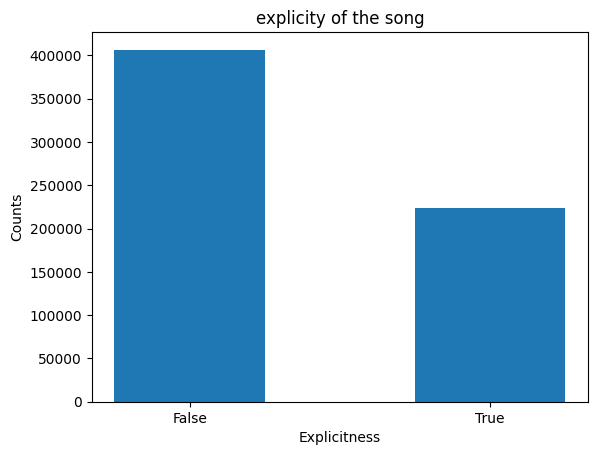

In [22]:
# explicty songs
plt.bar(x=['False','True'], height=spotify_df['is_explicit'].value_counts().values, width=0.5)
plt.title('explicity of the song')
plt.ylabel('Counts')
plt.xlabel('Explicitness')
plt.show()

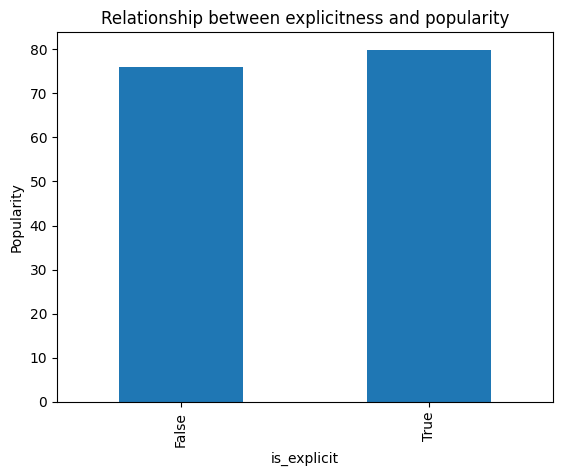

In [23]:
# Explore the relationship between the explicitness of songs and their popularity.
explicitness = spotify_df.groupby('is_explicit')['popularity'].mean()
explicitness.plot(kind='bar')
plt.title('Relationship between explicitness and popularity')
plt.ylabel('Popularity')
plt.show()


In [24]:
# tampilkan lagu yang paling populer di setiap negara
most_popular_in_every_country = spotify_df.groupby('country')['popularity'].idxmax()
most_popular_in_every_country = spotify_df.loc[most_popular_in_every_country][['country', 'name', 'artists', 'popularity']]
most_popular_in_every_country





,country,name,artists,popularity
25505,AE,Beautiful Things,Benson Boone,100
29149,AR,Beautiful Things,Benson Boone,100
25401,AT,Beautiful Things,Benson Boone,100
25350,AU,Beautiful Things,Benson Boone,100
25300,BE,Beautiful Things,Benson Boone,100
...,...,...,...,...
22153,US,Beautiful Things,Benson Boone,100
475182,UY,Si No Estás,iñigo quintero,99
22086,VE,Beautiful Things,Benson Boone,100
383857,VN,All I Want for Christmas Is You,Mariah Carey,100


In [25]:
correlation = spotify_df[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']].corr(method='spearman')
correlation

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
duration_ms,1.000000,-0.237067,-0.064499,-0.092275,-0.069979,0.060079,-0.158070,0.012156,0.004542,-0.001305,-0.215572,-0.035831,0.051632,0.022100
danceability,-0.237067,1.000000,0.192183,0.000278,0.212658,-0.194197,0.358962,-0.190193,0.060665,-0.167904,0.373811,-0.151511,0.093210,-0.034295
energy,-0.064499,0.192183,1.000000,0.029586,0.703023,-0.086979,0.131699,-0.442726,-0.065875,0.097011,0.331146,0.097628,0.046647,0.036178
key,-0.092275,0.000278,0.029586,1.000000,0.038422,-0.104236,0.012157,0.016262,-0.005884,0.001549,0.071864,0.073509,-0.060281,-0.004556
loudness,-0.069979,0.212658,0.703023,0.038422,1.000000,-0.050956,0.056787,-0.359704,-0.213428,0.051579,0.276575,0.015864,-0.040012,0.173058
mode,0.060079,-0.194197,-0.086979,-0.104236,-0.050956,1.000000,-0.175647,-0.009842,-0.032322,-0.013840,-0.074348,-0.012482,-0.016055,0.095336
speechiness,-0.158070,0.358962,0.131699,0.012157,0.056787,-0.175647,1.000000,-0.095825,-0.033148,0.014887,0.109435,0.075484,0.198831,-0.131433
acousticness,0.012156,-0.190193,-0.442726,0.016262,-0.359704,-0.009842,-0.095825,1.000000,-0.041890,-0.012309,-0.063380,-0.078526,-0.140709,-0.079224
instrumentalness,0.004542,0.060665,-0.065875,-0.005884,-0.213428,-0.032322,-0.033148,-0.041890,1.000000,-0.051783,-0.131471,0.025161,0.070653,0.015066
liveness,-0.001305,-0.167904,0.097011,0.001549,0.051579,-0.013840,0.014887,-0.012309,-0.051783,1.000000,-0.047384,0.054024,0.004818,-0.002889


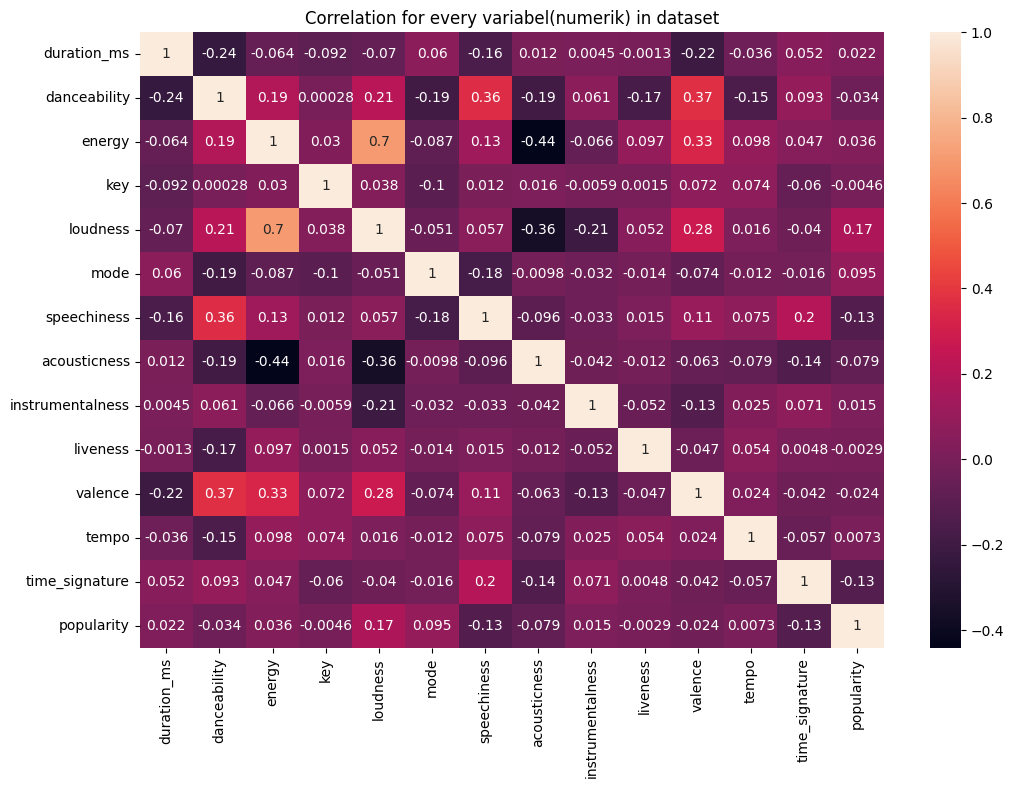

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True)
plt.title("Correlation for every variabel(numerik) in dataset")
plt.show()

In [27]:
# 10 lagu terpopuler di seluruh dunia
top_10_songs = spotify_df.groupby(['name', 'artists'])['popularity'].max().reset_index()
top_10_songs = top_10_songs.sort_values(by='popularity', ascending=False).head(10)
top_10_songs



,name,artists,popularity
874,Beautiful Things,Benson Boone,100
7784,greedy,Tate McRae,100
429,All I Want for Christmas Is You,Mariah Carey,100
1464,Cruel Summer,Taylor Swift,100
4028,Lovin On Me,Jack Harlow,99
3719,La Diabla,Xavi,99
6170,Si No Estás,iñigo quintero,99
4612,My Love Mine All Mine,Mitski,99
5052,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",98
2067,End of Beginning,Djo,98


In [28]:
# Predict the future popularity of songs based on historical data and machine learning algorithms such as xgboost or linear regression.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import xgboost
from sklearn.metrics import mean_squared_error

X = spotify_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y = spotify_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'XGBoost': xgboost.XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name}: {mse}')





Linear Regression: 233.20358017461632
Lasso: 244.84539622270952
Ridge: 233.20354471359403
XGBoost: 62.58742033798382


In [29]:
# predict the popularity of a song based on its features

song = {
    'danceability': 0.9,
    'energy': 0.8,
    'key': 11,
    'loudness': 5.0,
    'mode': 1,
    'speechiness': 0.1,
    'acousticness': 0.5,
    'instrumentalness': 0.9,
    'liveness': 0.3,
    'valence': 0.2,
    'tempo': 100,
    'time_signature': 3
}

song_df = pd.DataFrame([song])
predicted_popularity_xgboost = models['XGBoost'].predict(song_df)
predicted_popularity_linear_regression = models['Linear Regression'].predict(song_df)
predicted_popularity_lasso = models['Lasso'].predict(song_df)
predicted_popularity_ridge = models['Ridge'].predict(song_df)
print('Predicted popularity using XGBoost:', predicted_popularity_xgboost)
print('Predicted popularity using Linear Regression:', predicted_popularity_linear_regression)
print('Predicted popularity using Lasso:', predicted_popularity_lasso)
print('Predicted popularity using Ridge:', predicted_popularity_ridge)


Predicted popularity using XGBoost: [48.632614]
Predicted popularity using Linear Regression: [93.84879643]
Predicted popularity using Lasso: [86.41703485]
Predicted popularity using Ridge: [93.84904764]
